In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pylab as plt
from scipy.stats import norm
import math
import seaborn as sns

In [9]:
years = 2
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)
tickers =['000300.SS','CYBU.AS']

In [24]:
closePrices_df = pd.DataFrame()

In [28]:
for ticker in tickers:
    data = yf.download(ticker,start=startDate,end=endDate)
    closePrice[ticker]=data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
logReturn = np.log(closePrice/closePrice.shift(1))

In [53]:
logReturn = logReturn.dropna()

In [57]:
portfolio = 1000000
weights = {'000300.SS':0.60,
           'CYBU.AS':0.40
          }

In [63]:
logReturn2 = logReturn.mul(pd.Series(weights),axis = 1)

In [67]:
PortfoliologReturn = logReturn2.sum(axis = 1)

In [69]:
days = 10

In [71]:
PortfoliologReturnRolling = PortfoliologReturn.rolling(window=days).sum()

In [103]:
PortfoliologReturnRolling = PortfoliologReturnRolling()
PortfoliologReturnRolling = PortfoliologReturnRolling.dropna()

In [139]:
confidence_interval = 0.95

In [141]:
VaR = portfolio * (math.exp(np.percentile(PortfoliologReturnRolling,100 - confidence_interval*100))-1)

In [143]:
VaR

-25234.194426331345

In [145]:
return_windows = days
historyReturnRolling = PortfoliologReturn.rolling(window=days).sum()
historyReturnRolling = historyReturnRolling.dropna()
PortfolioReturn = portfolio * (np.exp(historyReturnRolling)-1)

In [147]:
PortfolioReturn

Date
2023-02-13    -8012.490889
2023-02-14    -1423.201328
2023-02-15    -8873.047526
2023-02-16   -13453.513151
2023-02-17   -14588.635347
                  ...     
2025-01-15   -20130.800442
2025-01-16    -2257.146464
2025-01-17     5210.291640
2025-01-20     8943.570159
2025-01-21     5750.991023
Length: 462, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not foun

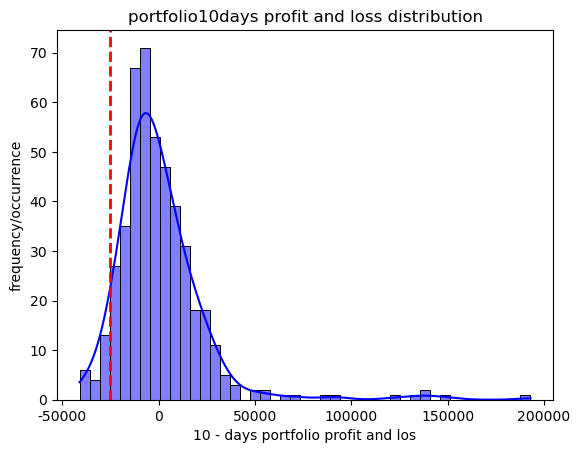

In [149]:
sns.histplot(PortfolioReturn,kde=True, color='blue')
plt.xlabel(f'{return_windows} - days portfolio profit and los')
plt.ylabel('frequency/occurrence')
plt.title(f'portfolio{return_windows}days profit and loss distribution')
plt.axvline(VaR,color='r',linestyle='dashed',linewidth=2,label=f'在{confidence_interval:.0%}confidence_interval')
plt.legend
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus']=False
plt.show